In [1]:
from cm1.input.sounding import to_txt
import cm1.input.era5
from cm1.skewt import skewt
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
valid_time = pd.to_datetime("20231225")
ds0 = cm1.input.era5.get(valid_time, campaign=True, model_levels=True)
ds0

<xarray.Dataset> Size: 6GB
Dimensions:     (latitude: 640, level: 137, longitude: 1280, half_level: 138)
Coordinates:
  * latitude    (latitude) float64 5kB 89.78 89.51 89.23 ... -89.51 -89.78
  * level       (level) int32 548B 1 2 3 4 5 6 7 ... 131 132 133 134 135 136 137
  * longitude   (longitude) float64 10kB 0.0 0.2812 0.5625 ... 359.2 359.4 359.7
  * half_level  (half_level) int32 552B 1 2 3 4 5 6 ... 133 134 135 136 137 138
    time        datetime64[ns] 8B 2023-12-25
Data variables: (12/17)
    Q           (level, latitude, longitude) float32 449MB <Quantity(dask.arr...
    a_half      (half_level) float64 1kB <Quantity(dask.array<where, shape=(1...
    a_model     (level) float64 1kB <Quantity(dask.array<where, shape=(137,),...
    b_half      (half_level) float64 1kB <Quantity(dask.array<where, shape=(1...
    b_model     (level) float64 1kB <Quantity(dask.array<where, shape=(137,),...
    weight      (latitude) float64 5kB <Quantity(dask.array<where, shape=(640...
    ...          ...
    P           (level, latitude, longitude) float64 898MB <Quantity(dask.arr...
    P_half      (half_level, latitude, longitude) float64 904MB <Quantity(das...
    Zsfc        (latitude, longitude) float32 3MB <Quantity([[ 5.61217368e-01...
    Tv          (level, latitude, longitude) float32 449MB <Quantity(dask.arr...
    Z_half      (half_level, latitude, longitude) float64 904MB <Quantity(das...
    Z           (level, latitude, longitude) float64 898MB <Quantity(dask.arr...
Attributes: (12/18)
    RDA_DATASET:                            ds633.6
    RDA_DATASET_URL:                        https:/rda.ucar.edu/datasets/ds63...
    RDA_DATASET_DOI:                        DOI: 10.5065/XV5R-5344
    RDA_DATASET_GROUP:                      ERA5 atmospheric model level anal...
    DATA_SOURCE:                            Downloaded by NCAR/CISL/DECS from...
    DOWNLOAD_SPECIALIST:                    Chi-Fan Shih, NCAR/CISL/DECS, chi...
    ...                                     ...
    NETCDF_COMPRESSION:                     Precision-preserving compression ...
    CONVERSION_AND_COMPRESSION_PLATFORM:    casper node employed: Linux crhtc...
    CONVERSION_AND_COMPRSSION_DATE:         Fri 10 May 2024 08:39:16 PM MDT
    CONVERSION_AND_COMPRESSION_SPECIALIST:  Dave Stepaniak, NCAR/CISL/DECS, d...
    history:                                Fri May 10 20:39:33 2024: ncks -4...
    NCO:                                    netCDF Operators version 5.1.9 (H...

In [3]:
import cm1
help(cm1.input)

Help on package cm1.input in cm1:

NAME
    cm1.input

PACKAGE CONTENTS
    era5
    sounding

FILE
    (built-in)




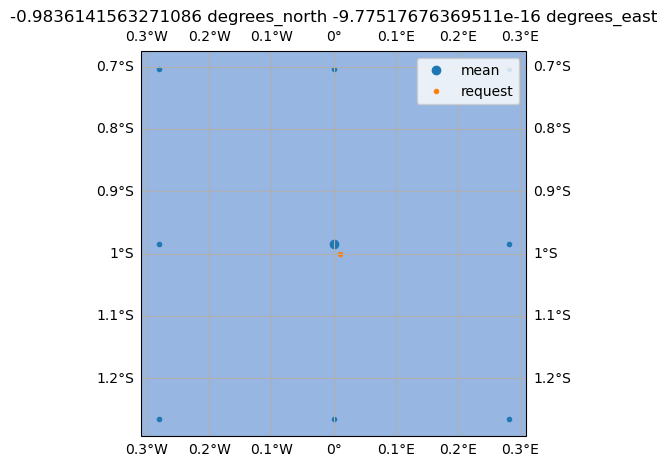

Magnitude,[2.265517423438723e-06 2.861576376744779e-06 3.438028670643689e-06 4.0267968870466575e-06 4.088351488462649e-06 4.09385620514513e-06 4.102932052774122e-06 4.109772817173507e-06 4.1075318222283386e-06 4.107180757273454e-06 4.0800714486977085e-06 3.974630544689717e-06 3.743774414033396e-06 3.626352963692625e-06 3.604689254643745e-06 3.5699033560376847e-06 3.5758359899773495e-06 3.570428816601634e-06 3.4477275221433956e-06 3.3601565974095138e-06 3.2764173738542013e-06 3.2204491162701743e-06 3.157028004352469e-06 3.148632913507754e-06 3.1263232358469395e-06 3.0913661248632707e-06 3.069331341976067e-06 3.04794889416371e-06 3.016103391928482e-06 2.9599718800454866e-06 2.906593408624758e-06 2.8583262974279933e-06 2.820309418893885e-06 2.7904393391509075e-06 2.7660323667078046e-06 2.753164153546095e-06 2.752834461716702e-06 2.7639830477710348e-06 2.788153778965352e-06 2.8225074402143946e-06 2.8597212349268375e-06 2.8954063964192756e-06 2.9332993563002674e-06 2.981798843393335e-06 3.0468481782008894e-06 3.1108838811633177e-06 3.1429328828380676e-06 3.1563968150294386e-06 3.170746367686661e-06 3.176658537995536e-06 3.156955244776327e-06 3.096121190537815e-06 3.0102996788627934e-06 2.9170028028602246e-06 2.728763320192229e-06 2.3179466097644763e-06 1.8968071344716009e-06 1.7961524463316891e-06 2.123236527040717e-06 2.280450871694484e-06 2.6992979655915406e-06 3.0095502552285325e-06 3.808537712757243e-06 4.2294577724533156e-06 5.229127509664977e-06 8.04698356660083e-06 1.2990994036954362e-05 1.4643527720181737e-05 1.7327742170891725e-05 2.0886758647975512e-05 2.499516267562285e-05 2.7875121304532513e-05 2.904846223827917e-05 3.5808683605864644e-05 5.4765823733760044e-05 7.252491195686162e-05 9.319378295913339e-05 0.00011958418326685205 0.000143218130688183 0.00014043324335943907 0.00011414053733460605 8.325770613737404e-05 7.270704372785985e-05 7.906351675046608e-05 9.366237645735964e-05 9.756017243489623e-05 0.0001472205767640844 0.0004403803322929889 0.0007971337763592601 0.0007370809908024967 0.000701913028024137 0.0006212803418748081 0.0006370661430992186 0.00126769975759089 0.0032444866374135017 0.0050750854425132275 0.005961241200566292 0.006483109667897224 0.006357582286000252 0.006444993894547224 0.006679022219032049 0.006631075870245695 0.006719313096255064 0.007263915613293648 0.008259998634457588 0.009056820534169674 0.00962589867413044 0.009845269843935966 0.00995353888720274 0.010495387017726898 0.011095622554421425 0.011921455152332783 0.012756923213601112 0.01343568041920662 0.013985786586999893 0.014482926577329636 0.014897700399160385 0.015199446119368076 0.015437636524438858 0.015600363723933697 0.01573398895561695 0.01601474918425083 0.016232503578066826 0.01668543741106987 0.017084456980228424 0.017505768686532974 0.017612693831324577 0.017648153007030487 0.01767660304903984 0.017681054770946503 0.01769041083753109 0.01770271547138691 0.017719589173793793 0.017741642892360687 0.01777188666164875 0.01782509870827198 0.017952673137187958]
Units,dimensionless
Magnitude,[0.0 2.000365 3.102241 4.666084 6.827977 9.746966 13.605424 18.608931 24.985718 32.98571 42.879242 54.955463 69.520576 86.895882 107.415741 131.425507 159.279404 191.338562 227.968948 269.539581 316.420746 368.982361 427.592499 492.616028 564.413452 643.339905 729.744141 823.967834 926.34491 1037.201172 1156.853638 1285.610352 1423.770142 1571.622925 1729.448975 1897.519287 2076.095947 2265.431641 2465.770508 2677.348145 2900.391357 3135.119385 3381.743652 3640.468262 3911.490479 4194.930664 4490.817383 4799.149414 5119.89502 5452.990723 5798.344727 6156.074219 6526.946777 6911.870605 7311.869141 7727.412109 8159.354004 8608.525391 9076.400391 9562.682617 10065.978516 10584.631836 11116.662109 11660.067383 12211.547852 12766.873047 13324.668945 13881.331055 14432.139648 14975.615234 15508.256836 16026.115234 16527.322266 17008.789063 17467.613281 17901.621094 18308.433594 18685.71875 19031.289063 19343.511719 19620.042969 19859.390625 20059.931641

In [4]:
from metpy.units import units
lon = -1 * units.degree_E
lat = 0.01 * units.degree_N
neighbors = 9
debug = True

s = cm1.utils.era5_circle_neighborhood(ds0, lon, lat, neighbors, debug=debug)
s

/glade/derecho/scratch/ahijevyc/cm1/cm1/skewt.py:260: UserWarning: Interpolation point out of data bounds encountered
  (agl2p,) = interpolate_1d(label_hgt, agl, p)


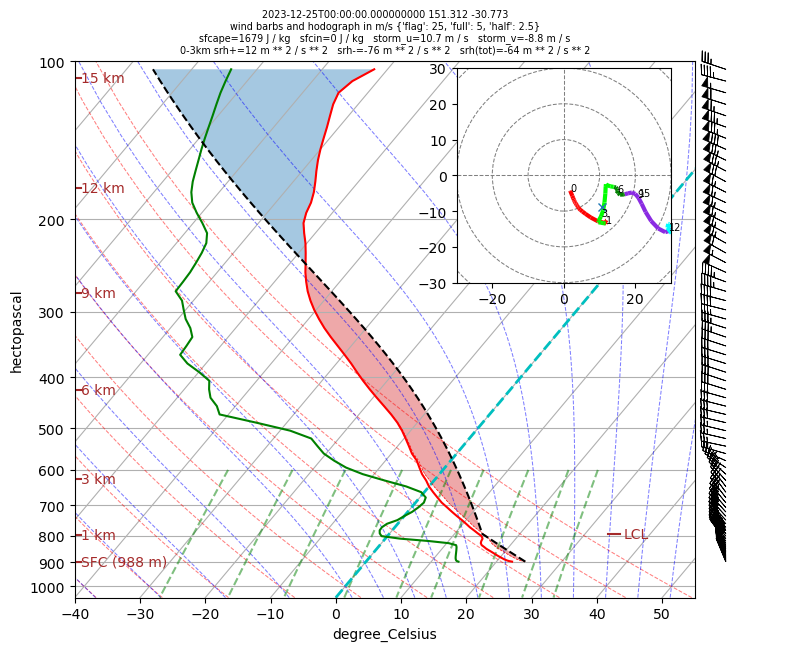

In [5]:
longitude = 151.2
latitude = -30.8
ds = ds0.sel(longitude=longitude, latitude=latitude, method="nearest")
fig = plt.figure(figsize=(8,8))
skewt(ds, fig=fig)

/glade/derecho/scratch/ahijevyc/cm1/cm1/skewt.py:260: UserWarning: Interpolation point out of data bounds encountered
  (agl2p,) = interpolate_1d(label_hgt, agl, p)
/glade/derecho/scratch/ahijevyc/cm1/cm1/skewt.py:260: UserWarning: Interpolation point out of data bounds encountered
  (agl2p,) = interpolate_1d(label_hgt, agl, p)


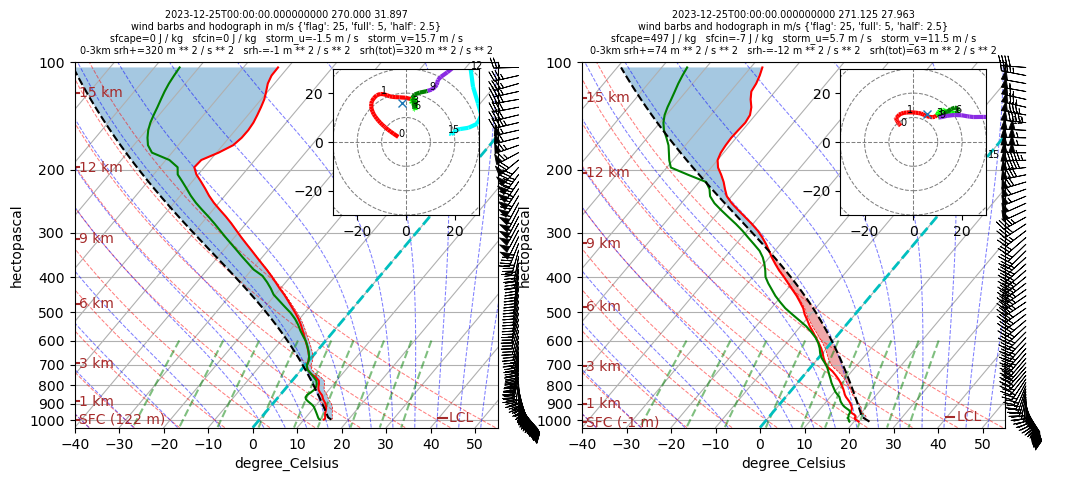

In [6]:
locs = [(270, 32), (271, 28)]

# Create a figure
fig = plt.figure(figsize=(12, 8))

# Initialize SkewT for each subplot
for index, (longitude, latitude) in enumerate(locs):
    ds = ds0.sel(longitude = longitude, latitude=latitude, method="nearest")
    skew = skewt(ds, fig=fig, subplot=(1,2,index+1))

In [7]:
ofile = "t.csv"
with open(ofile, "w") as f:
    f.write(to_txt(ds))

In [8]:
pd.read_csv(ofile, skiprows=1, sep=" ", names=["z", "theta", "q", "u", "v"])

,z,theta,q,u,v
0,9.332434,293.296407,13.777171,-5.196335,6.587040
1,9.332434,293.296407,13.777171,-5.196335,6.587040
2,9.332434,293.296407,13.777171,-5.196335,6.587040
3,9.332434,293.296407,13.777171,-5.196335,6.587040
4,9.332434,293.296407,13.777171,-5.196335,6.587040
...,...,...,...,...,...
18901,76988.977091,5193.549192,0.001745,13.755211,-3.053879
18902,76988.977091,5193.549192,0.001745,13.755211,-3.053879
18903,76988.977091,5193.549192,0.001745,13.755211,-3.053879
18904,76988.977091,5193.549192,0.001745,13.755211,-3.053879


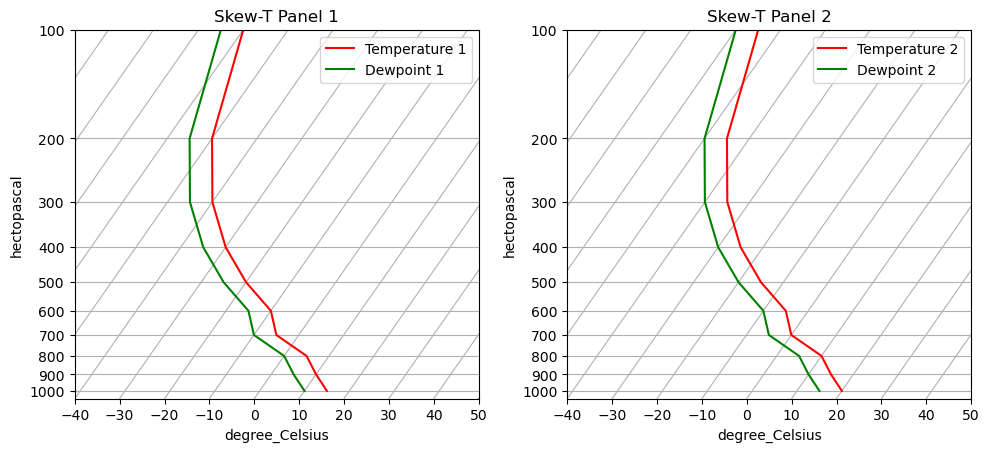

In [9]:
import matplotlib.pyplot as plt
from metpy.plots import SkewT
from metpy.units import units
import numpy as np

# Example data
pressure = np.array([1000, 900, 800, 700, 600, 500, 400, 300, 200, 100]) * units.hPa
temperature1 = np.array([15, 10, 5, -5, -10, -20, -30, -40, -50, -60]) * units.degC
temperature2 = np.array([20, 15, 10, 0, -5, -15, -25, -35, -45, -55]) * units.degC
dewpoint1 = np.array([10, 5, 0, -10, -15, -25, -35, -45, -55, -65]) * units.degC
dewpoint2 = np.array([15, 10, 5, -5, -10, -20, -30, -40, -50, -60]) * units.degC

# Create figure with two subplots side by side
fig =  plt.figure(figsize=(10, 8))

# First Skew-T plot
skew1 = SkewT(fig, subplot=(1,2,1), rotation=35)
skew1.plot(pressure, temperature1, 'r', label='Temperature 1')
skew1.plot(pressure, dewpoint1, 'g', label='Dewpoint 1')
skew1.ax.set_title('Skew-T Panel 1')
skew1.ax.legend()

# Second Skew-T plot
skew2 = SkewT(fig, subplot=(1,2,2), rotation=35)
skew2.plot(pressure, temperature2, 'r', label='Temperature 2')
skew2.plot(pressure, dewpoint2, 'g', label='Dewpoint 2')
skew2.ax.set_title('Skew-T Panel 2')
skew2.ax.legend()

plt.tight_layout()
plt.show()
